Opening Year:
Ampang Line - 1996
KJ - 1998
Monorail - 2003
MRT Kajang - 2016
MRT Putrajaya - 2022

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('bmh')
pd.options.mode.chained_assignment = None

# Pulling the Data

Data range is January 2019 - December 2024.

In [3]:
URL = 'https://storage.data.gov.my/transportation/ridership_headline.parquet'
df = pd.read_parquet(URL)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2192 non-null   datetime64[ns]
 1   bus_rkl             1096 non-null   Int64         
 2   bus_rkn             1096 non-null   Int64         
 3   bus_rpn             1096 non-null   Int64         
 4   rail_lrt_ampang     2192 non-null   Int64         
 5   rail_mrt_kajang     2192 non-null   Int64         
 6   rail_lrt_kj         2192 non-null   Int64         
 7   rail_monorail       2192 non-null   Int64         
 8   rail_mrt_pjy        930 non-null    Int64         
 9   rail_ets            1539 non-null   Int64         
 10  rail_intercity      1539 non-null   Int64         
 11  rail_komuter_utara  1539 non-null   Int64         
 12  rail_tebrau         927 non-null    Int64         
 13  rail_komuter        458 non-null    Int64       

In [4]:
df.describe()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter
count,2192,1096.0,1096.0,1096.0,2192.0,2192.0,2192.0,2192.0,930.0,1539.0,1539.0,1539.0,927.0,458.0
mean,2021-12-31 12:00:00,170072.344891,2379.140511,38349.458029,127995.705292,142821.560675,172719.627737,33172.278741,87988.750538,8042.901235,2791.338532,8659.849903,8359.349515,35470.844978
min,2019-01-01 00:00:00,71611.0,916.0,20758.0,6587.0,4973.0,7195.0,1392.0,12108.0,50.0,28.0,436.0,4348.0,20236.0
25%,2020-07-01 18:00:00,136824.75,2043.5,34601.5,87346.25,82245.25,104255.25,17603.5,24700.75,3841.5,1302.5,4688.5,7878.5,30235.25
50%,2021-12-31 12:00:00,164275.5,2385.0,39256.5,129210.5,141602.5,157179.0,33673.5,94454.5,9882.0,2482.0,9253.0,8472.0,36775.0
75%,2023-07-02 06:00:00,213359.25,2718.25,43108.25,168924.75,204515.5,253222.25,48552.5,134672.5,11772.5,4268.5,12332.5,9072.0,38607.25
max,2024-12-31 00:00:00,264236.0,4865.0,56449.0,258313.0,367376.0,352328.0,91717.0,220980.0,14584.0,7648.0,21817.0,10036.0,89320.0
std,NaN,46169.856328,503.095683,6430.953185,56924.121444,73425.470861,92102.923074,17258.735188,52153.91953,4525.916857,1844.627371,4594.335058,1000.697749,6630.316599


# Focusing on Rapid Rail (LRT & MRT)

In [5]:
rapid_rail = df[['date', 'rail_lrt_ampang', 'rail_mrt_kajang', 'rail_lrt_kj', 'rail_monorail', 'rail_mrt_pjy']]
numeric_cols = rapid_rail.select_dtypes(include=['float64', 'int64']).columns.to_list()
rapid_rail['total'] = rapid_rail[numeric_cols].sum(axis=1)
numeric_cols.append('total')
rapid_rail.describe()

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total
count,2192,2192.0,2192.0,2192.0,2192.0,930.0,2.192000e+03
mean,2021-12-31 12:00:00,127995.705292,142821.560675,172719.627737,33172.278741,87988.750538,5.140402e+05
min,2019-01-01 00:00:00,6587.0,4973.0,7195.0,1392.0,12108.0,2.019000e+04
25%,2020-07-01 18:00:00,87346.25,82245.25,104255.25,17603.5,24700.75,2.978885e+05
50%,2021-12-31 12:00:00,129210.5,141602.5,157179.0,33673.5,94454.5,4.948440e+05
75%,2023-07-02 06:00:00,168924.75,204515.5,253222.25,48552.5,134672.5,7.525982e+05
max,2024-12-31 00:00:00,258313.0,367376.0,352328.0,91717.0,220980.0,1.270777e+06
std,NaN,56924.121444,73425.470861,92102.923074,17258.735188,52153.91953,2.683286e+05


In [6]:
rapid_rail.head()

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total
0,2019-01-01,113357,114173,139634,35804,<NA>,402968
1,2019-01-02,182715,169316,274224,31859,<NA>,658114
2,2019-01-03,187904,175304,286469,31893,<NA>,681570
3,2019-01-04,198420,187891,304755,34121,<NA>,725187
4,2019-01-05,120773,112660,145036,29950,<NA>,408419


# Analysis from a Yearly Perspective

In [7]:
rapid_rail_by_year = rapid_rail.groupby(rapid_rail['date'].dt.year)[numeric_cols].sum()
rapid_rail_by_year.reset_index(inplace=True)

In [8]:
rapid_rail_by_year.head(10).style.format(thousands=',')

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total
0,"2,019","65,147,222","63,952,805","94,657,974","12,535,738",0,"236,293,739"
1,"2,020","34,715,565","33,168,335","45,307,182","7,143,534",0,"120,334,616"
2,"2,021","21,938,973","19,573,010","25,123,614","4,226,329",0,"70,861,926"
3,"2,022","44,151,332","45,348,209","55,015,765","10,668,069","4,147,577","159,330,952"
4,"2,023","50,590,579","66,501,508","73,763,592","18,107,573","29,555,851","238,519,103"
5,"2,024","64,022,915","84,520,994","84,733,297","20,032,392","48,126,110","301,435,708"


## Ridership Change from 2019 to 2024

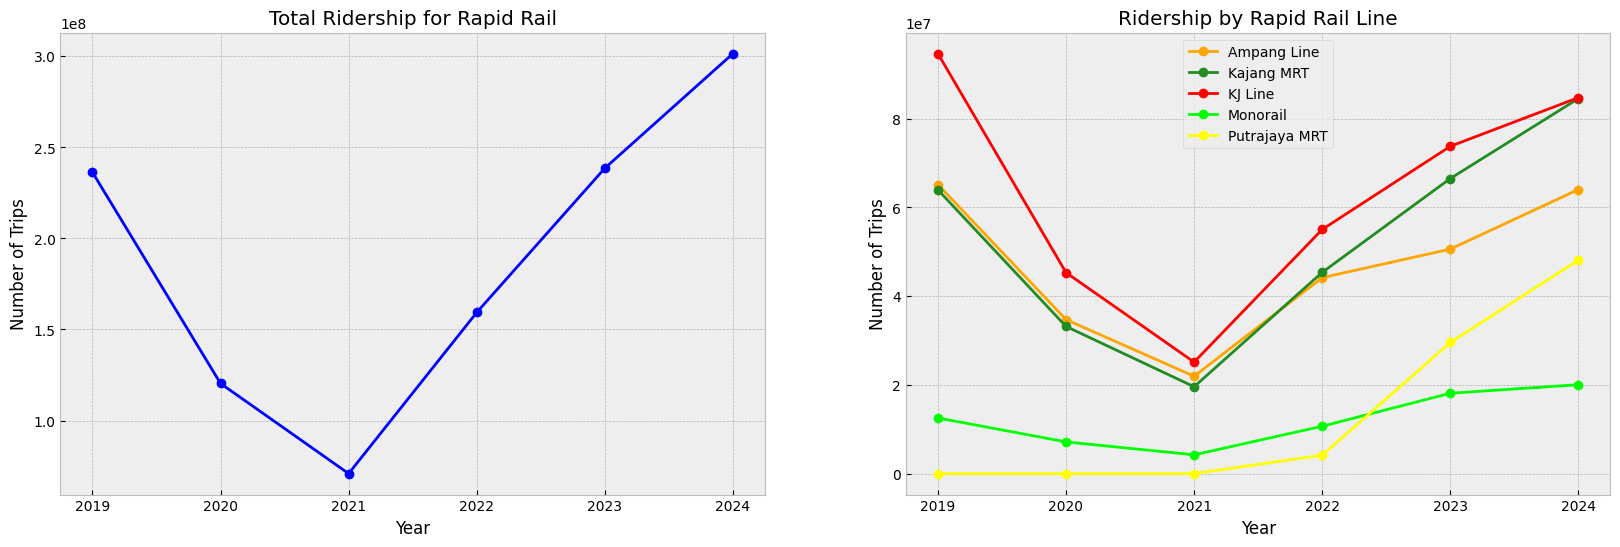

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(rapid_rail_by_year['date'], rapid_rail_by_year['total'], marker='o', color='blue')
ax[0].set_title('Total Ridership for Rapid Rail')
ax[0].set_ylabel('Number of Trips')
ax[0].set_xlabel('Year')

ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_lrt_ampang'], marker='o', label='Ampang Line', color='orange')
ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_mrt_kajang'], marker='o', label='Kajang MRT', color='forestgreen')
ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_lrt_kj'], marker='o', label='KJ Line', color='red')
ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_monorail'], marker='o', label='Monorail', color='lime')
ax[1].plot(rapid_rail_by_year['date'], rapid_rail_by_year['rail_mrt_pjy'], marker='o', label='Putrajaya MRT', color='yellow')
ax[1].set_title('Ridership by Rapid Rail Line')
ax[1].set_ylabel('Number of Trips')
ax[1].set_xlabel('Year')
ax[1].legend()

Takeaways:
1. Ridership has been increasing over the past 3 years, with ridership levels for the past two years above the pre-pandemic level (year 2019).
2. This increase is mainly driven by the two MRT lines, with the ridership of the Kajang MRT particularly impressive.
3. Ridership of the Ampang Line is almost back at pre-pandemic levels whilst Monorail ridership has increased but is flattening out.
4. Unfortunately, Ridership of the Kelana Jaya Line still remains below pre-pandemic levels and it does not appear that it will reach it.

In [10]:
ridership_change = {}
ridership_change['total'] = (rapid_rail_by_year.query('date == 2024')['total'].values[0] -
                             rapid_rail_by_year.query('date == 2019')['total'].values[0])
for col in numeric_cols:
    ridership_change[col] = (rapid_rail_by_year.query('date == 2024')[col].values[0] -
                             rapid_rail_by_year.query('date == 2019')[col].values[0])

In [11]:
ridership_change

{'total': 65141969,
 'rail_lrt_ampang': -1124307,
 'rail_mrt_kajang': 20568189,
 'rail_lrt_kj': -9924677,
 'rail_monorail': 7496654,
 'rail_mrt_pjy': 48126110}

Text(0, 0.5, 'Number of Trips')

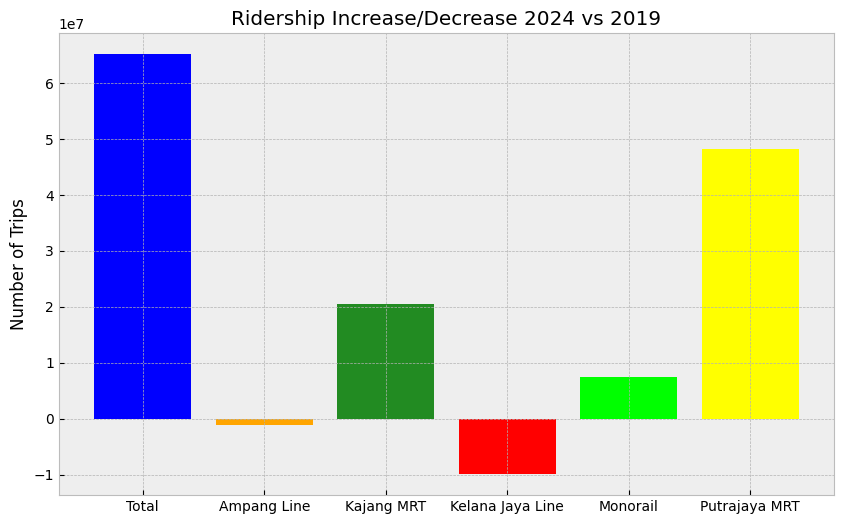

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=['Total', 'Ampang Line', 'Kajang MRT', 'Kelana Jaya Line', 'Monorail', 'Putrajaya MRT'],
       height=ridership_change.values(),
       color=['blue', 'orange', 'forestgreen', 'red', 'lime', 'yellow'])
ax.set_title('Ridership Increase/Decrease 2024 vs 2019')
ax.set_ylabel('Number of Trips')

## 2024 Ridership per KM

As a measure of potential and productivity (?)

In [13]:
rapid_rail_by_year

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total
0,2019,65147222,63952805,94657974,12535738,0,236293739
1,2020,34715565,33168335,45307182,7143534,0,120334616
2,2021,21938973,19573010,25123614,4226329,0,70861926
3,2022,44151332,45348209,55015765,10668069,4147577,159330952
4,2023,50590579,66501508,73763592,18107573,29555851,238519103
5,2024,64022915,84520994,84733297,20032392,48126110,301435708


In [14]:
line_distance = {
    'total': 203.8,
    'rail_lrt_ampang': 45.1,
    'rail_mrt_kajang': 46.0,
    'rail_lrt_kj': 46.4,
    'rail_monorail': 8.6,
    'rail_mrt_pjy': 57.7
}

ridership_per_km = {}
for col in numeric_cols:
    ridership_per_km[col] = rapid_rail_by_year.query('date == 2024')[col].values[0] / line_distance[col]

ridership_per_km

{'rail_lrt_ampang': 1419576.8292682925,
 'rail_mrt_kajang': 1837412.9130434783,
 'rail_lrt_kj': 1826148.6422413795,
 'rail_monorail': 2329347.906976744,
 'rail_mrt_pjy': 834074.6967071057,
 'total': 1479076.0942100098}

Text(0, 0.5, 'Number of Trips per km')

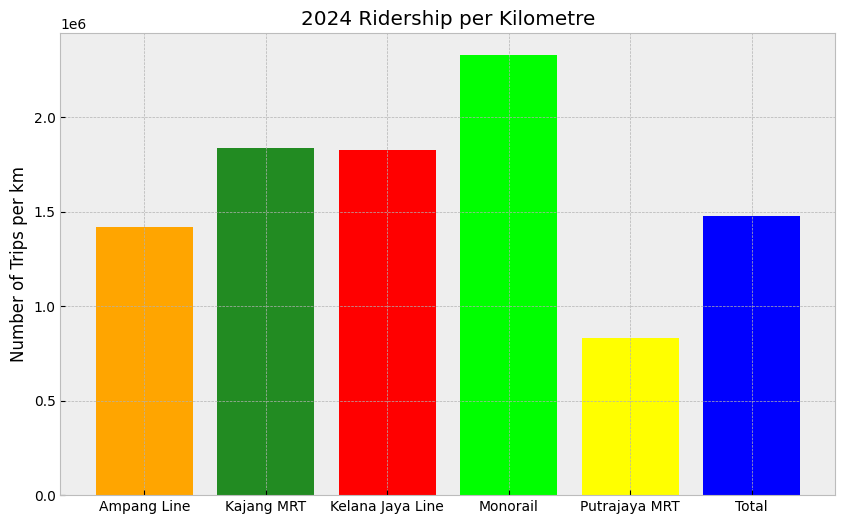

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=['Ampang Line', 'Kajang MRT', 'Kelana Jaya Line', 'Monorail', 'Putrajaya MRT', 'Total'],
       height=ridership_per_km.values(),
       color=['orange', 'forestgreen', 'red', 'lime', 'yellow', 'blue'])
ax.set_title('2024 Ridership per Kilometre')
ax.set_ylabel('Number of Trips per km')

My takeaways:
1. It can be argued that Monorail is surprisingly the most popular/efficient. I'm surprised at the performance of Monorail considering my own experience.
2. The Putrajaya MRT is underutilized.
3. I looked into it briefly and I don't think these changes are related to fare differences.

# Analysis from a Daily Perspective

In [16]:
rapid_rail['day'] = rapid_rail['date'].dt.day_name()
rapid_rail['is_weekend'] = rapid_rail['day'].isin(['Saturday', 'Sunday'])
rapid_rail.head()

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total,day,is_weekend
0,2019-01-01,113357,114173,139634,35804,<NA>,402968,Tuesday,False
1,2019-01-02,182715,169316,274224,31859,<NA>,658114,Wednesday,False
2,2019-01-03,187904,175304,286469,31893,<NA>,681570,Thursday,False
3,2019-01-04,198420,187891,304755,34121,<NA>,725187,Friday,False
4,2019-01-05,120773,112660,145036,29950,<NA>,408419,Saturday,True


In [17]:
rapid_rail_2024 = rapid_rail[rapid_rail['date'].dt.year == 2024]
rapid_rail_2024.describe().style.format(thousands=',')

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2024-07-01 12:00:00.000000256,"174,925.997268","230,931.677596","231,511.740437","54,733.311475","131,492.103825","823,594.830601"
min,2024-01-01 00:00:00,"90,321.000000","130,563.000000","110,222.000000","28,097.000000","64,358.000000","437,651.000000"
25%,2024-04-01 06:00:00,"143,206.250000","197,200.250000","164,943.250000","52,222.250000","98,720.750000","658,154.000000"
50%,2024-07-01 12:00:00,"188,265.500000","244,461.500000","263,214.000000","55,886.500000","144,009.500000","898,219.500000"
75%,2024-09-30 18:00:00,"203,809.000000","263,397.000000","278,880.250000","58,396.750000","157,803.250000","960,976.250000"
max,2024-12-31 00:00:00,"244,890.000000","367,376.000000","345,814.000000","91,717.000000","220,980.000000","1,270,777.000000"
std,nan,"34,890.979871","40,864.582943","59,916.815183","6,578.563048","32,062.900562","169,879.848256"


In [18]:
rapid_rail_2024_by_day = rapid_rail_2024.groupby('day')[numeric_cols].sum()
rapid_rail_2024_by_day.reset_index(inplace=True)
rapid_rail_2024_by_day.style.format(thousands=',')

,day,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total
0,Friday,"10,196,730","13,238,798","13,683,769","3,068,600","7,731,380","47,919,277"
1,Monday,"9,695,612","12,554,686","13,091,059","2,938,616","7,444,237","45,724,210"
2,Saturday,"7,464,988","10,068,324","8,410,019","2,683,694","5,088,733","33,715,758"
3,Sunday,"6,461,838","8,754,450","7,277,903","2,494,795","4,276,517","29,265,503"
4,Thursday,"9,859,205","12,940,796","13,714,313","2,905,445","7,632,447","47,052,206"
5,Tuesday,"10,339,254","13,560,769","14,471,161","3,000,732","8,093,858","49,465,774"
6,Wednesday,"10,005,288","13,403,171","14,085,073","2,940,510","7,858,938","48,292,980"


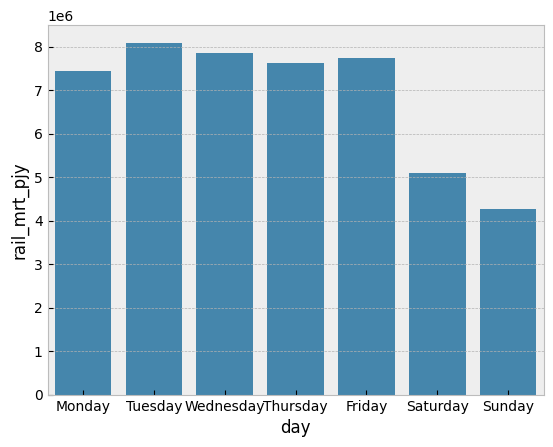

In [19]:
sns.barplot(
    data=rapid_rail_2024_by_day,
    x='day',
    y='rail_mrt_pjy',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # Order of elements in the X-axis
)
plt.show()

In [20]:
rapid_rail_2024_by_weekend = rapid_rail_2024.groupby('is_weekend')[numeric_cols].sum()
rapid_rail_2024_by_weekend.reset_index(inplace=True)
rapid_rail_2024_by_weekend.style.format(thousands=',')

,is_weekend,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total
0,False,"50,096,089","65,698,220","69,045,375","14,853,903","38,760,860","238,454,447"
1,True,"13,926,826","18,822,774","15,687,922","5,178,489","9,365,250","62,981,261"


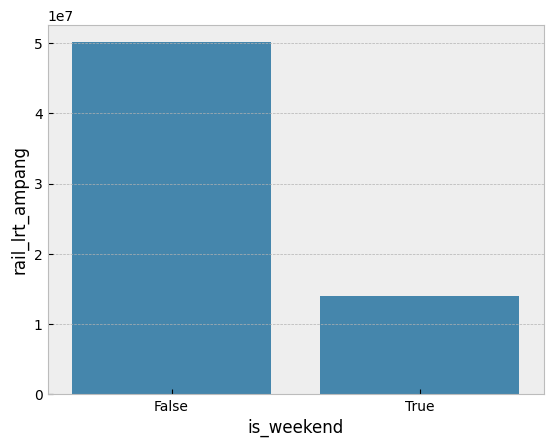

In [21]:
sns.barplot(
    data=rapid_rail_2024_by_weekend,
    x='is_weekend',
    y='rail_lrt_ampang'
)
plt.show()

([<matplotlib.patches.Wedge at 0x22f799c3460>,
 [Text(-0.9007625012175245, 0.6313690809663942, 'Weekday'),
  Text(0.9007624125479562, -0.6313692074695959, 'Weekend')],
 [Text(-0.49132500066410423, 0.3443831350725786, '81%'),
  Text(0.4913249522988851, -0.34438320407432504, '19%')])

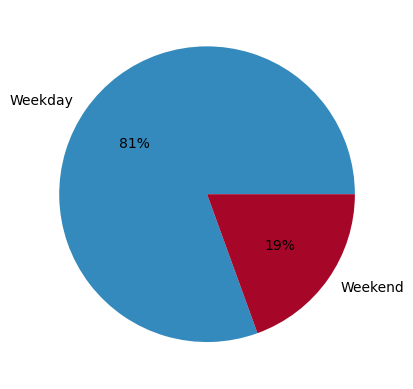

In [27]:
plt.pie(rapid_rail_2024_by_weekend['rail_mrt_pjy'], labels=['Weekday', 'Weekend'], autopct='%1.0f%%')

Text(0.5, 1.0, 'Monorail Only')

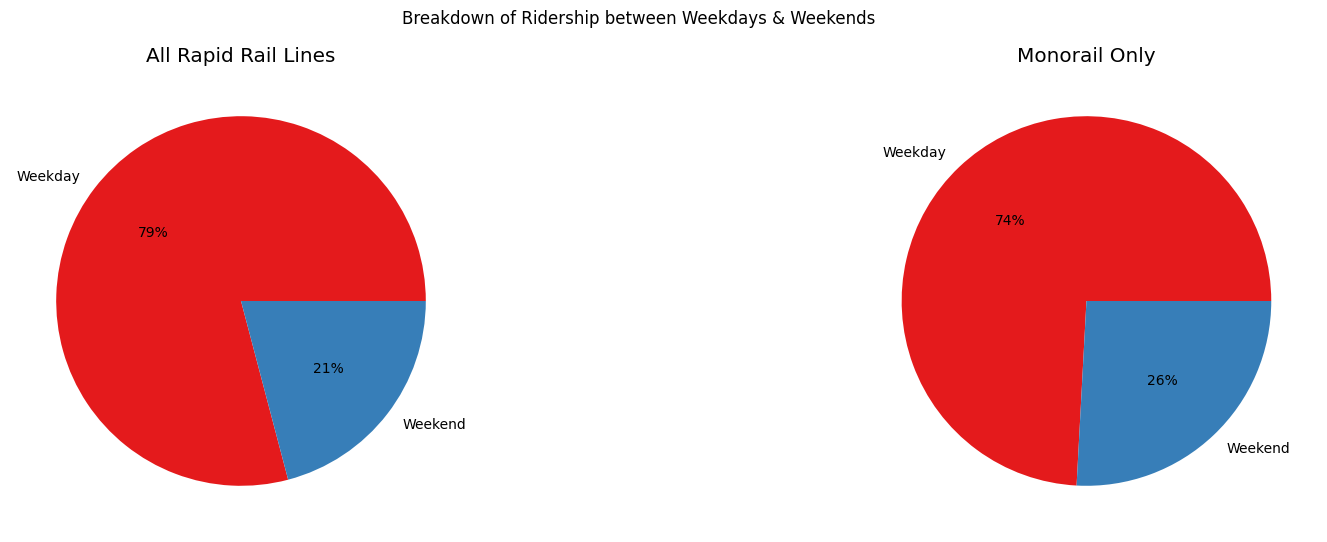

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
fig.suptitle('Breakdown of Ridership between Weekdays & Weekends')
ax[0].pie(rapid_rail_2024_by_weekend['total'], labels=['Weekday', 'Weekend'], autopct='%1.0f%%', colors=sns.color_palette('Set1'))
ax[0].set_title('All Rapid Rail Lines')

ax[1].pie(rapid_rail_2024_by_weekend['rail_monorail'], labels=['Weekday', 'Weekend'], autopct='%1.0f%%', colors=sns.color_palette('Set1'))
ax[1].set_title('Monorail Only')

# Analysis from a Monthly Perspective

## Looking into Monthly Distribution

In [53]:
rapid_rail_by_month = rapid_rail_2024.groupby(rapid_rail['date'].dt.month)[numeric_cols].sum()
rapid_rail_by_month.reset_index(inplace=True)

In [54]:
rapid_rail_by_month.head().style.format(thousands=',')

,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total
0,1,"4,505,943","6,506,378","6,591,331","1,680,097","3,651,371","22,935,120"
1,2,"4,430,513","6,167,840","6,236,607","1,602,411","3,364,322","21,801,693"
2,3,"5,196,908","6,650,215","6,937,237","1,607,756","3,746,093","24,138,209"
3,4,"4,894,934","6,262,373","6,445,256","1,557,086","3,575,514","22,735,163"
4,5,"5,607,473","7,112,851","7,206,997","1,605,161","4,045,346","25,577,828"


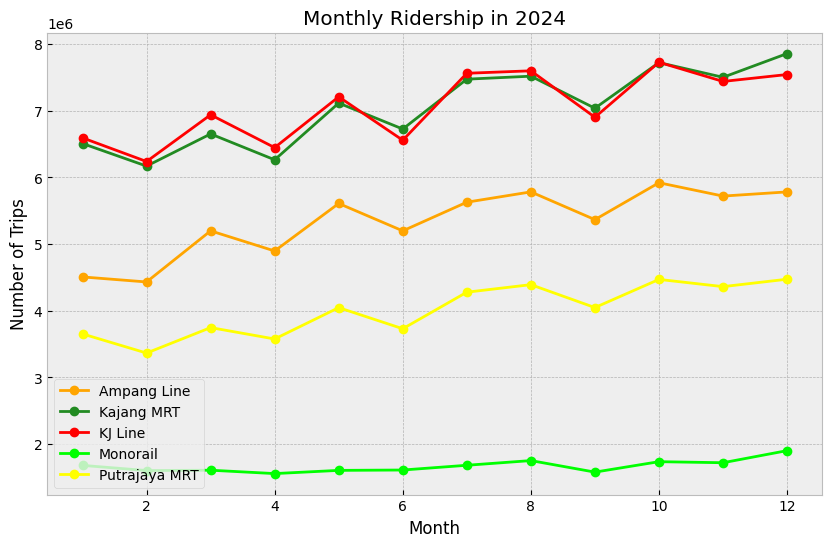

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_lrt_ampang'], marker='o', label='Ampang Line', color='orange')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_mrt_kajang'], marker='o', label='Kajang MRT', color='forestgreen')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_lrt_kj'], marker='o', label='KJ Line', color='red')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_monorail'], marker='o', label='Monorail', color='lime')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_mrt_pjy'], marker='o', label='Putrajaya MRT', color='yellow')
ax.set_title('Monthly Ridership in 2024')
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Month')
ax.legend()

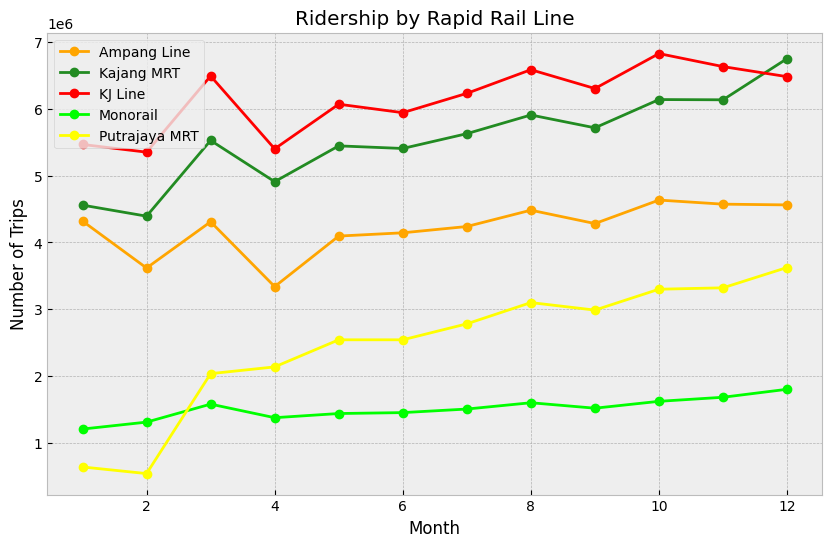

In [56]:
rapid_rail_2023 = rapid_rail[rapid_rail['date'].dt.year == 2023]
rapid_rail_by_month = rapid_rail_2023.groupby(rapid_rail['date'].dt.month)[numeric_cols].sum()
rapid_rail_by_month.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_lrt_ampang'], marker='o', label='Ampang Line', color='orange')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_mrt_kajang'], marker='o', label='Kajang MRT', color='forestgreen')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_lrt_kj'], marker='o', label='KJ Line', color='red')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_monorail'], marker='o', label='Monorail', color='lime')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_mrt_pjy'], marker='o', label='Putrajaya MRT', color='yellow')
ax.set_title('Ridership by Rapid Rail Line')
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Month')
ax.legend()

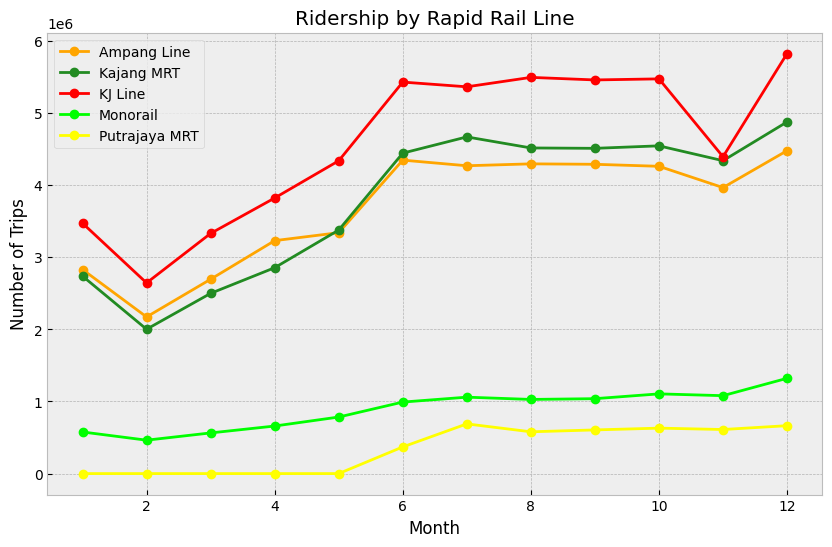

In [57]:
rapid_rail_2022 = rapid_rail[rapid_rail['date'].dt.year == 2022]
rapid_rail_by_month = rapid_rail_2022.groupby(rapid_rail['date'].dt.month)[numeric_cols].sum()
rapid_rail_by_month.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_lrt_ampang'], marker='o', label='Ampang Line', color='orange')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_mrt_kajang'], marker='o', label='Kajang MRT', color='forestgreen')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_lrt_kj'], marker='o', label='KJ Line', color='red')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_monorail'], marker='o', label='Monorail', color='lime')
ax.plot(rapid_rail_by_month['date'], rapid_rail_by_month['rail_mrt_pjy'], marker='o', label='Putrajaya MRT', color='yellow')
ax.set_title('Ridership by Rapid Rail Line')
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Month')
ax.legend()